## HEART DISEASE PREDICTION MODEL

In [252]:
##This data set contains diagnoses and indicators of human examinations based on which,it will determine whether there is a heart disease or not.
## The features include age, gender,cholestrol,resting ECG,CA levels,Slope levels,trestbps,cp,fbs,thalach,oldPeakHistory,exang,thal

# Age: The age of the individual in years.
# Gender: The gender of the individual (e.g., Male/Female).
# Cholesterol: The cholesterol level of the individual measured in mg/dl.
# Resting ECG: The resting electrocardiographic results, which could include different categories such as normal, abnormal ST-T wave, or probable or definite left ventricular hypertrophy.
# CA Levels: CA stands for Cornary arteries.The number of major vessels (0-3) colored by fluoroscopy.
# Slope Levels: The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping).
# Trestbps: The resting blood pressure of the individual measured in mm Hg.
# Cp: The type of chest pain experienced by the individual, which could be categorized into different levels such as typical angina, atypical angina, non-anginal pain, or asymptomatic.
# Fbs: Fasting blood sugar level > 120 mg/dl (1 = true; 0 = false).
# Thalach: The maximum heart rate achieved during the exercise test.
# OldPeakHistory: ST depression induced by exercise relative to rest.
# Exang: Exercise induced angina (1 = yes; 0 = no).
# Thal: A categorical variable representing the thalassemia type, which could include categories like normal, fixed defect, or reversible defect.

##It is binary dataset containing two classes,0 and 1.
##The value 1 indicates the person is suffering from heart disease and 0 indicates he/she is healthy.

### Loading Data 

In [253]:
import os
print(os.listdir('C:\Desktop\HEART_DISEASE'))
import numpy as np #numerical python for arrays,matrices 
import pandas as pd #for data analysis and visualization 
import seaborn as sn

df = pd.read_csv('C:\Desktop\HEART_DISEASE\HEARTT.csv')

['API.py', 'dataset.ipynb', 'heart.csv', 'HEARTT.csv', 'model.pkl', 'templates']


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\anbre\AppData\Local\Temp\ipykernel_12648\3942538460.py:2: SyntaxWarning: invalid escape sequence '\D'
  print(os.listdir('C:\Desktop\HEART_DISEASE'))
C:\Users\anbre\AppData\Local\Temp\ipykernel_12648\3942538460.py:7: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('C:\Desktop\HEART_DISEASE\HEARTT.csv')


### To identify is it balanced dataset?


In [254]:
target_counts = df['target'].value_counts()  # Get counts of each value
print(target_counts)

target
1    165
0    138
Name: count, dtype: int64


### (Number of samples,feataures)


In [255]:
print(df.shape)

(303, 14)


In [256]:
df.sample(10)

,age,gender,cp,trestbps,cholestrol,fbs,restingECG,thalach,exang,oldPeakHistory,Slopelevels,CAlevels,thal,target
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1


### Information about Columns 

In [257]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   gender          303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trestbps        303 non-null    int64  
 4   cholestrol      303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restingECG      303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldPeakHistory  303 non-null    float64
 10  Slopelevels     303 non-null    int64  
 11  CAlevels        303 non-null    int64  
 12  thal            303 non-null    int64  
 13  target          303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


### Counting duplicate values 

In [258]:
df.duplicated().sum()

1

### Counting Null values 

In [259]:
df.isnull().sum()

age               0
gender            0
cp                0
trestbps          0
cholestrol        0
fbs               0
restingECG        0
thalach           0
exang             0
oldPeakHistory    0
Slopelevels       0
CAlevels          0
thal              0
target            0
dtype: int64

### Changing some columns' names 

In [260]:
new_column_names = {'sex': 'gender', 'chol': 'cholestrol','restecg': 'resting ECG','oldpeak':'oldPeakHistory', 'ca':'CA levels','slope':'Slope levels'}
df = df.rename(columns=new_column_names)


In [261]:
df.sample(10)

,age,gender,cp,trestbps,cholestrol,fbs,restingECG,thalach,exang,oldPeakHistory,Slopelevels,CAlevels,thal,target
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0


## Univariate analysis

### 1.Histogram(Continuous data)


<Axes: xlabel='age', ylabel='Count'>

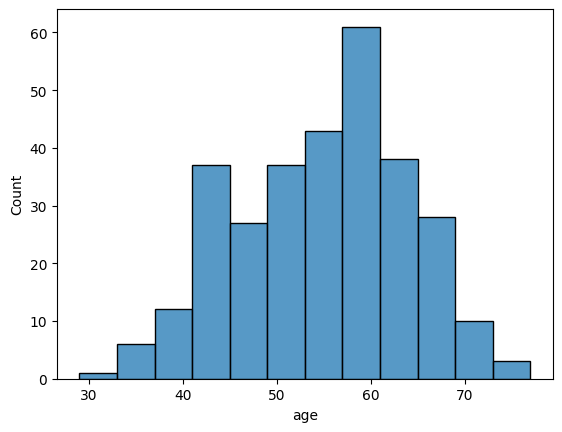

In [262]:
sn.histplot(data=df, x='age')


##### Histogram shows that majority of the people diagnosed,belong to age group of 60.

### 2.Count Plot(Catagorical data)


In [263]:
sn.countplot(x='CA levels', data=df)
## 0 indicates that there are no significant blockage in the major coronary arteries.
# 1 indicates that there is a blockage in one of the major coronary arteries. 
# 2 indiactes that there are blockages in two of the major coronary arteries.
# 3 indicates that there are blockages or abnormalities detected in all three major coronary arteries. 

ValueError: Could not interpret value `CA levels` for `x`. An entry with this name does not appear in `data`.

##### The above plot indicates that most of the people don't have any blockage or abnormalities in any of their cornary artery.

### 3.Count Plot(Catagorical data)


<Axes: xlabel='cp', ylabel='count'>

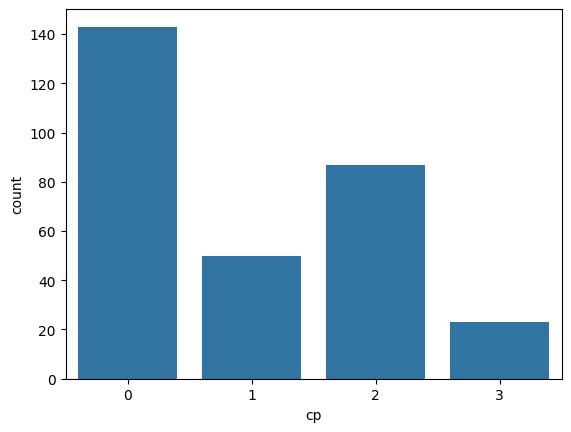

In [ ]:
sn.countplot(x='cp', data=df)
## HERE 0 indicates TypicalAnginal cp,
# 1 indicates A-Typical Anginal cp,
# 2 indicates Non-anginal, 
# 4 indicates Asymptomatic 

##### The above plot indicates that most of the people, according to provided dataset have typical angina.Typical angina is a condition in which pain is typically described as a sensation of pressure, tightness, or squeezing in the center of the chest behind the sternum. It may also radiate to the neck, jaw, shoulders, arms (usually the left arm), or back.

### 4.Histogram(Continous Data)

<Axes: xlabel='trestbps', ylabel='Count'>

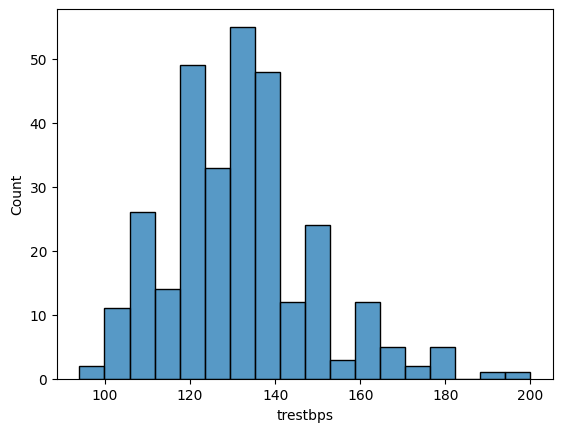

In [ ]:
sn.histplot(data=df, x='trestbps')


##### Histogram shows that majority of the people diagnosed,have the resting blood pressure between(120-140).

### 5.CountPlot (Catagorical Data)

<Axes: xlabel='fbs', ylabel='count'>

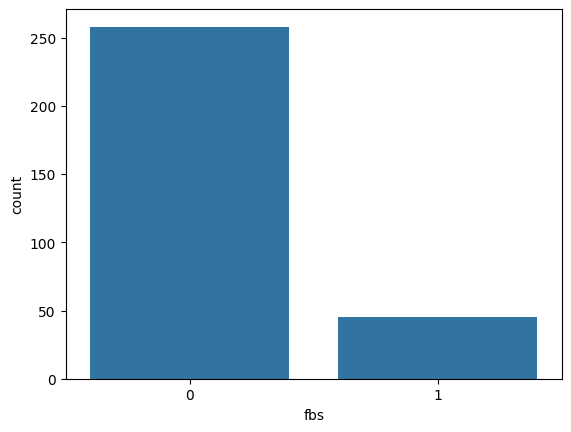

In [ ]:
sn.countplot(x='fbs', data=df)


##### The count plot indicates that majority of the people,have fasting blood sugar greater than 120 mg/dl that is higher than normal fasting blood sugar rate.

## Bivariate Analysis

### 1.Bar Plot(Catagorical data)


<Axes: xlabel='cp', ylabel='target'>

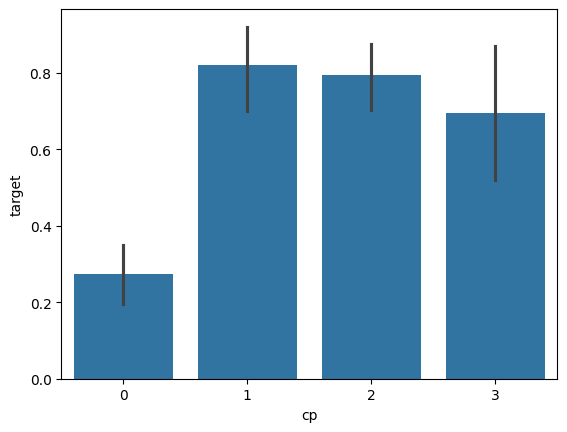

In [ ]:
sn.barplot(x='cp', y='target', data=df)



##### Above bar plot indicates that people having A-typical angina are most likely to suffer from Heart disease.

### 2.Scatter Plot(compare numerical values)


<Axes: xlabel='age', ylabel='trestbps'>

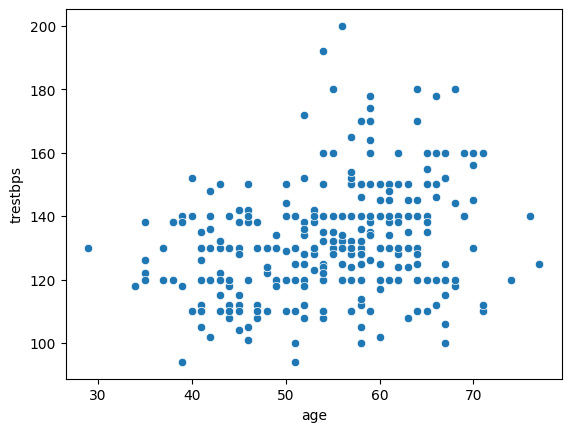

In [ ]:
sn.scatterplot(x='age', y='trestbps', data=df)


##### In above scatterplot, each point represents a data point and it's position is decided by the values of both attributes.Each datapoint indicates that at which a person of specific age group would have a specific TheRestingBloodPressure.

### 3.Scatter Plot(compare numerical values)


<Axes: xlabel='thalach', ylabel='age'>

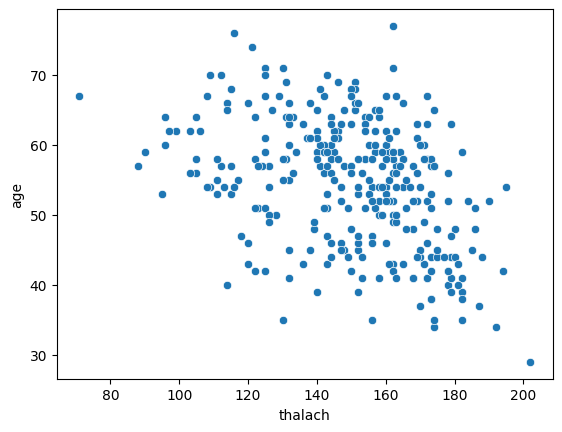

In [ ]:
sn.scatterplot(x='thalach', y='age', data=df)


##### In above scatterplot, each point represents a data point and it's position is decided by the values of both attributes.Each datapoint indicates that at which a person of specific age group would have a specific value of max heart rate acheived during exercise test.

### 4.Line Plot(Continuous data)

<Axes: xlabel='trestbps', ylabel='age'>

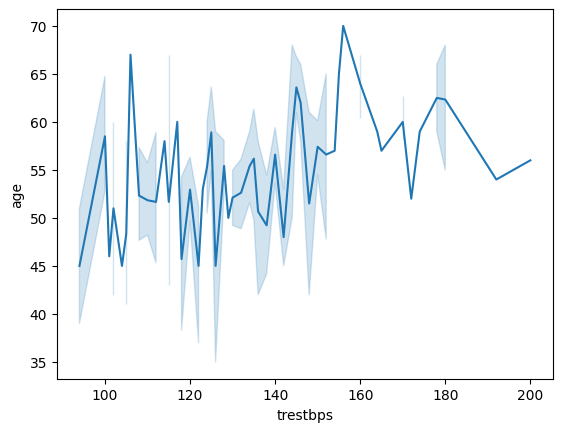

In [ ]:
sn.lineplot(x='trestbps', y='age', data=df)


##### above line plot provides the relation between age and The resting blood pressure.

### 5.Line Plot 

<Axes: xlabel='age', ylabel='thalach'>

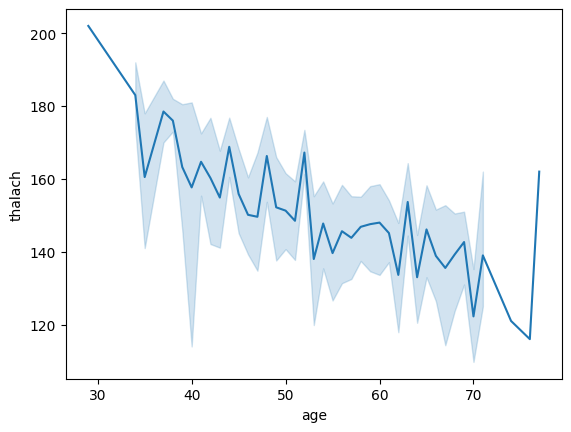

In [ ]:
sn.lineplot(x='age', y='thalach', data=df)


##### above line plot provides the relation between age and value of max heart rate acheived during exercise test.

## Multivariate Analysis

### 1.Heatmap

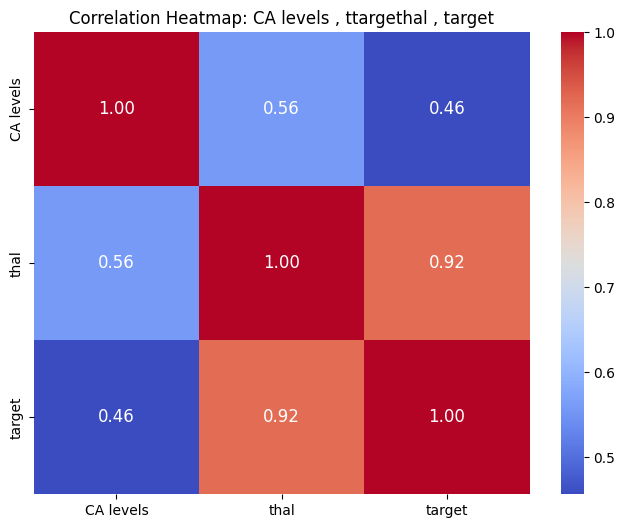

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration
data = {
    'CA levels': [2, 1, 0, 2, 0],
    'thal': [1, 2, 1, 3, 1],
    'target': [0, 1, 0, 1, 0]
}

# Convert data dictionary to a DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df[['CA levels', 'thal', 'target']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap: CA levels , ttargethal , target')
plt.show()




##### Each cell in the heatmap contains a numerical value representing the correlation coefficient between two attributes. These values range from -1 to 1.
##### The colors in the heatmap represent the correlation coefficients between pairs of attributes. Positive correlations(increase in value of one attribute causes increase in the value of others')are depicted in warmer colors (e.g., red), while negative correlations(increase in value of one attribute causes decrease in the value of others')are depicted in cooler colors (e.g., blue).

### 2. Bar Plot (comparing catagorical values)

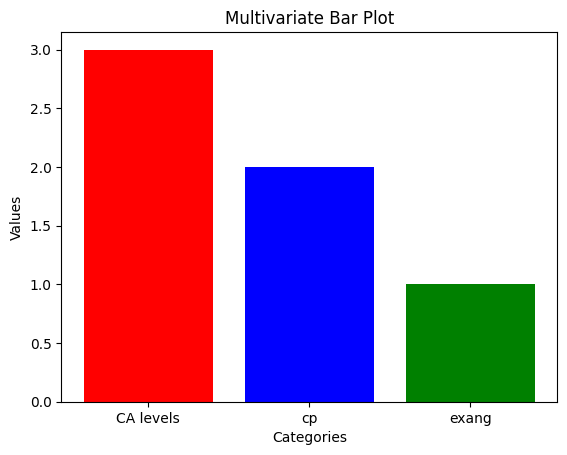

In [ ]:
import matplotlib.pyplot as plt

categories = ['CA levels', 'cp', 'exang']
values = [3, 2, 1]
colors = ['red', 'blue', 'green']  # Colors representing a third variable

plt.bar(categories, values, color=colors)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Multivariate Bar Plot')
plt.show()


##### In the above plot,we've added a third variable,named colors to make plot multivariate.

### 3.Bar Plot(Comparing multiple variables)

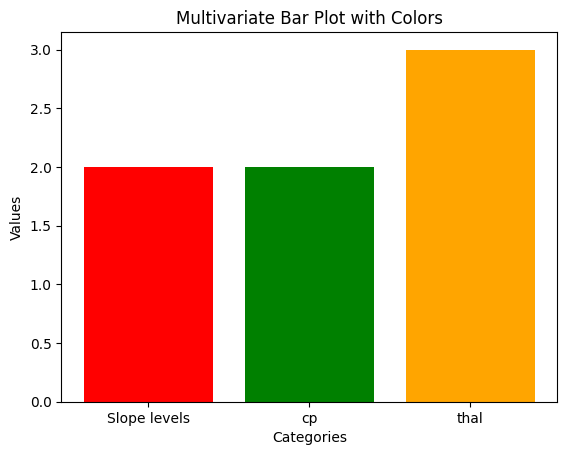

In [ ]:
import matplotlib.pyplot as plt

categories = ['Slope levels', 'cp', 'thal']
values = [2, 2, 3]
colors = ['red', 'green', 'orange']# New variable representing colors for each category

plt.bar(categories, values, color=colors)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Multivariate Bar Plot with Colors')
plt.show()

##### In the above plot,we've added a third variable,named colors to make plot multivariate.

### 4.Heatmap

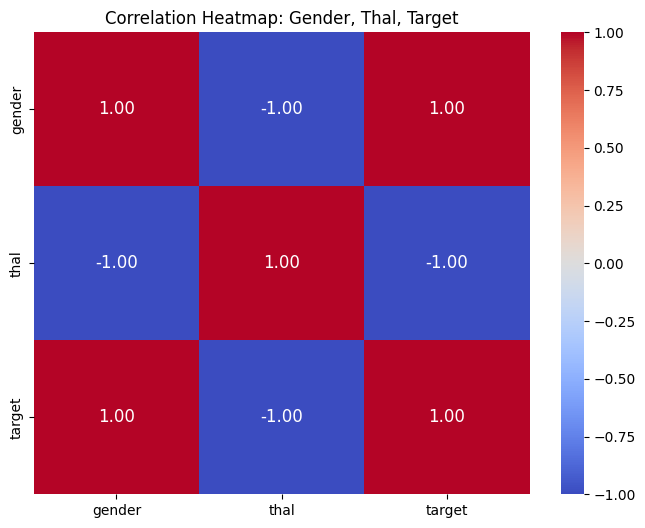

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration
data = {
    'gender': [0, 1, 0, 1, 0],
    'thal': [1, 0, 1, 0, 1],
    'target': [0, 1, 0, 1, 0]
}

# Convert data dictionary to a DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df[['gender', 'thal', 'target']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12}, center=0)
plt.title('Correlation Heatmap: Gender, Thal, Target')
plt.show()


##### Each cell in the heatmap contains a numerical value representing the correlation coefficient between two attributes. These values range from -1 to 1.
##### The colors in the heatmap represent the correlation coefficients between pairs of attributes. Positive correlations(increase in value of one attribute causes increase in the value of others')are depicted in warmer colors (e.g., red), while negative correlations(increase in value of one attribute causes decrease in the value of others')are depicted in cooler colors (e.g., blue).

### Perforamnce Of Model 

Accuracy: 0.7704918032786885
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



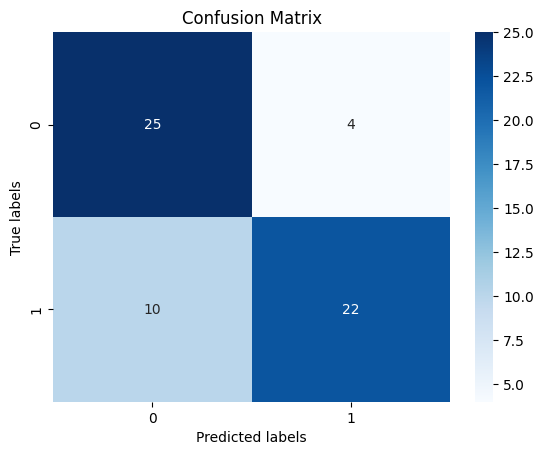

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

X = df[['age', 'gender', 'cp', 'trestbps', 'cholestrol', 'fbs', 'restingECG', 'thalach', 'exang', 'oldPeakHistory', 'Slopelevels', 'CAlevels', 'thal']]
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix and plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


 ##### The model correctly predicts instances where the true label is positive (1) as positive (1). In this case, it correctly predicts patients who are diagnosed with heart disease.
##### False Positive (FP): The model incorrectly predicts instances where the true label is negative (0) as positive (1). In this case, it incorrectly predicts persons  who are not diagnosed with heart disease as patients of heart disease.
##### True Negative (TN): The model correctly predicts instances where the true label is negative (0) as negative (0). In this case, it correctly predicts persons  who are not diagnosed with heart disease.
##### False Negative (FN): The model incorrectly predicts instances where the true label is positive (1) as negative (0). In this case, it incorrectly predicts patients who are diagnosed with heart disease as not having the disease.

### How many samples in training set  

In [ ]:
print(X_train.shape)

### How many samples in testing set  

In [ ]:
print(X_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

# Create a sample machine learning model
model = LogisticRegression()
model.fit(df[['age', 'gender', 'cp', 'trestbps', 'cholestrol', 'fbs', 'restingECG', 'thalach', 'exang', 'oldPeakHistory', 'Slopelevels', 'CAlevels', 'thal']], df['target'])

# Dump the model to a file
pickle.dump(model, open('model.pkl', 'wb'))

# Load the model from the file
load_model = pickle.load(open('model.pkl', 'rb'))

# Now you can call the predict method on the loaded model
load_model.predict(df[['age', 'gender', 'cp', 'trestbps', 'cholestrol', 'fbs', 'restingECG', 'thalach', 'exang', 'oldPeakHistory', 'Slopelevels', 'CAlevels', 'thal']])

KeyError: "['resting ECG', 'oldPeakHistory', 'Slope levels', 'CA levels'] not in index"